# 2018 Bay Wheels Ride Data Exploration and Visualization
### by Ayush Ranjan
## Preliminary Wrangling

> Bay Wheels (previously known as Ford GoBike) is a regional public bike sharing system in the San Francisco Bay Area, California. Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States with nearly 500,000 rides since the launch in 2017 and had about 10,000 annual subscribers as of January 2018. The dataset used for this exploratory analysis consists of monthly individual trip data of January 2018 in CSV format.We will be assessing the dataset questions such as:- What were the gender of people which used bikes more this month,whether there were more customers or subscribers,Which gender of people used the bike for more duration and many more.

### Gathering and Assessing Data

> We will start off by importing the required libraries and reading the datset while printing a few lines of it.

In [1]:
# import all the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df=pd.read_csv('201801-fordgobike-tripdata.csv')

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


> We will check whether the values of all columns are present or not.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

> Now we will try to investigate more about the data and get a understanding about it.

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,94802.000000,94802.000000,94802.000000,94802.000000,94802.00000,94802.000000,94802.000000,94802.000000,86963.000000
mean,870.935930,103.766302,37.773321,-122.361677,101.00982,37.773536,-122.360776,2048.751609,1980.932420
std,2550.596891,87.730464,0.085744,0.105253,86.77949,0.085552,0.104580,1091.507513,10.803017
min,61.000000,3.000000,37.317298,-122.444293,3.00000,37.317298,-122.444293,11.000000,1900.000000
25%,359.000000,30.000000,37.771662,-122.412408,27.00000,37.773063,-122.411306,1133.000000,1975.000000
50%,555.000000,79.000000,37.781270,-122.398773,76.00000,37.781752,-122.398436,2151.500000,1983.000000
75%,854.000000,160.000000,37.795392,-122.390428,157.00000,37.795392,-122.390428,3015.000000,1989.000000
max,85546.000000,342.000000,37.880222,-121.874119,342.00000,37.880222,-121.874119,3744.000000,2000.000000


In [6]:
df.nunique()

duration_sec                4512
start_time                 94801
end_time                   94797
start_station_id             273
start_station_name           273
start_station_latitude       273
start_station_longitude      273
end_station_id               272
end_station_name             272
end_station_latitude         272
end_station_longitude        272
bike_id                     3065
user_type                      2
member_birth_year             72
member_gender                  3
bike_share_for_all_trip        2
dtype: int64

In [7]:
df.member_gender.value_counts()

Male      65508
Female    20298
Other      1195
Name: member_gender, dtype: int64

In [8]:
df.user_type.value_counts()

Subscriber    82458
Customer      12344
Name: user_type, dtype: int64

In [9]:
sum(df.duplicated())

0

### Cleaning Data
> We will drop all the rows with missing values from the dataset.

In [10]:
df.dropna(inplace=True)

> We will check again whether the values were dropped or not.

In [11]:
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

> The type of user_type and member_gender must be converted to the category type.

In [12]:
df['user_type'] = df['user_type'].astype('category')
df['member_gender'] = df['member_gender'].astype('category')

> We will check whether the conversion was successful or not.

In [13]:
df.dtypes

duration_sec                  int64
start_time                   object
end_time                     object
start_station_id              int64
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_station_id                int64
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
bike_id                       int64
user_type                  category
member_birth_year           float64
member_gender              category
bike_share_for_all_trip      object
dtype: object

> We will create two new columns with values age and duration in minutes for the ease in visualising the info provided to us.

In [14]:
df['age']=2020-df['member_birth_year']

In [15]:
df['duration_minute'] = df['duration_sec']/60

> We will now check whether the columns were added or not.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             86963 non-null  int64   
 1   start_time               86963 non-null  object  
 2   end_time                 86963 non-null  object  
 3   start_station_id         86963 non-null  int64   
 4   start_station_name       86963 non-null  object  
 5   start_station_latitude   86963 non-null  float64 
 6   start_station_longitude  86963 non-null  float64 
 7   end_station_id           86963 non-null  int64   
 8   end_station_name         86963 non-null  object  
 9   end_station_latitude     86963 non-null  float64 
 10  end_station_longitude    86963 non-null  float64 
 11  bike_id                  86963 non-null  int64   
 12  user_type                86963 non-null  category
 13  member_birth_year        86963 non-null  float64 
 14  member

### What is the structure of your dataset?

The original combined data contains approximately 94,000 individual trip records with 16 variables collected. The variables can be divided into 3 major categories:
- trip duration: `duration_sec`, `start_time`, `end_time`


- station info: `start_station_id`, `start_station_name`, `start_station_latitude`, `start_station_longitude`, `end_station_id`, `end_station_name`, `end_station_latitude`, `end_station_longitude`


- member info: `bike_id`, `user_type`, `member_birth_year`, `member_gender`, `bike_share_for_all_trip`

- Derived features/variables to assist exploration and analysis: `duration_minute`,`age`

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in exploring the user types which used the services whether they were subscribers or customers,The age of the members using the service, the duration for which they used the service and the gender of the members which used the services and compare these together with each other.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Each trip's duration information will help understanding how long a trip usually takes. The member information like user type, gender and age will help us find out who are our main customer groups, use the different groups to summarize bike usage data to see if there is any correlation among them and we relate it to a specific group of riders.

> We will start the visualisation process now by making a copy of the cleaned dataset and check whether the information is correctly loaded or not.

In [17]:
biketrip=df.copy()

In [18]:
biketrip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86963 entries, 0 to 94801
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             86963 non-null  int64   
 1   start_time               86963 non-null  object  
 2   end_time                 86963 non-null  object  
 3   start_station_id         86963 non-null  int64   
 4   start_station_name       86963 non-null  object  
 5   start_station_latitude   86963 non-null  float64 
 6   start_station_longitude  86963 non-null  float64 
 7   end_station_id           86963 non-null  int64   
 8   end_station_name         86963 non-null  object  
 9   end_station_latitude     86963 non-null  float64 
 10  end_station_longitude    86963 non-null  float64 
 11  bike_id                  86963 non-null  int64   
 12  user_type                86963 non-null  category
 13  member_birth_year        86963 non-null  float64 
 14  member

## Uni-Variate Plots

### Which type of members used the services more?

> We will plot the graph between types of users that are Customers and Subscribers to determine which are more in numberss.

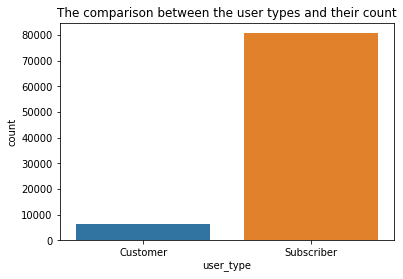

In [19]:
sb.countplot(x='user_type', data=biketrip)
plt.title('The comparison between the user types and their count')
plt.show()

> **Observation:-** We can clearly observe from the above graph that the number of subscribers are very much than the number of customers which clearly shows that most of the users were subscribers and use the services regularly. 

### Which age group used the services most?

> We will plot the age of the members with the number of users from that group and decide which age group was most active in using these services.

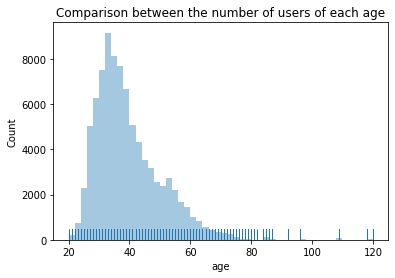

In [20]:
sb.distplot(biketrip.age, kde=False, rug=True);
plt.ylabel('Count');
plt.title('Comparison between the number of users of each age');

> **Observation:-** We can clearly see from the above graph that the age group of 30-40 has used the services the most while the age group of 70-80 used the services least.

## Bi-Variate Plots:

### Which type of user used the services for longer time?

> We will find the graph between the user types and the time duration for which the services were availed. 

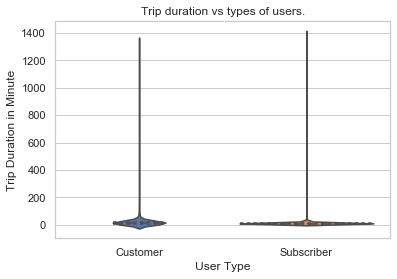

In [22]:
sb.set(style="whitegrid")
sb.violinplot(data=biketrip, x='user_type', y='duration_minute', inner='quartile');
plt.title('Trip duration vs types of users.');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

> we observed that this is because of the outliers present in the dataset,we will ignore those outliers because we have to focus on the values for normal analysis.

> We will now try to study the duration a bit more.

In [23]:
biketrip['duration_minute'].describe()

count    86963.000000
mean        12.139881
std         30.022394
min          1.016667
25%          5.850000
50%          8.933333
75%         13.450000
max       1410.150000
Name: duration_minute, dtype: float64

> From the above info we can gather that almost 75% of the data is under 14 and the mean is 12 still we will manage for the duration till 1 hour and remove all the values above 65 from the dataset.

> After the removal of the outliers plot the graph again in the same way as above.

In [24]:
biketrip = biketrip.query('duration_minute <= 65')
biketrip.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86319 entries, 6 to 94801
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   duration_sec             86319 non-null  int64   
 1   start_time               86319 non-null  object  
 2   end_time                 86319 non-null  object  
 3   start_station_id         86319 non-null  int64   
 4   start_station_name       86319 non-null  object  
 5   start_station_latitude   86319 non-null  float64 
 6   start_station_longitude  86319 non-null  float64 
 7   end_station_id           86319 non-null  int64   
 8   end_station_name         86319 non-null  object  
 9   end_station_latitude     86319 non-null  float64 
 10  end_station_longitude    86319 non-null  float64 
 11  bike_id                  86319 non-null  int64   
 12  user_type                86319 non-null  category
 13  member_birth_year        86319 non-null  float64 
 14  member

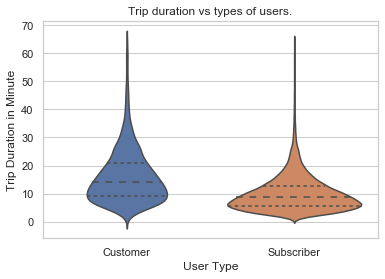

In [25]:
sb.set(style="whitegrid")
sb.violinplot(data=biketrip, x='user_type', y='duration_minute', inner='quartile');
plt.title('Trip duration vs types of users.');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');

> **Observation:-** We can clearly observe from the above graph that the trip duration was less for for the subscribers while with the increase with increase in duration time the Customer plot became more broad as compared to the subscriber plot.

> We also observed that the subscribers are using the sevices more for less duration while the customers are using them for more time as well.

### Which gender uses the services more and at which age?

> We will plot the violin plot between the age and the gender of the members to determine which gender was using the services at which age.

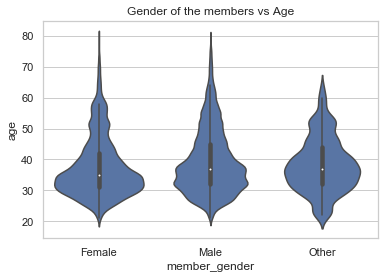

In [27]:
data = biketrip[['member_gender', 'age']][biketrip.age < 80]
plt.title('Trip duration vs types of users.');
sb.violinplot(data=data, x='member_gender', y='age', color=sb.color_palette()[0]);

>**observation:-** We can clearly see that the females between age group 30-35 where using the services more than the men and other gender.In the same way we can visualise the same for all the other age groups as well.

## Multi-Variate Plots:

### The age and gender distribution based on the user type:

> We will plot the gender of the gender vs age bar plot for both the user types to clearly see the data.

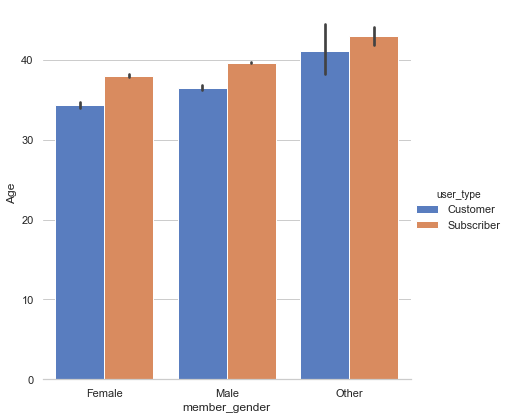

In [26]:
g = sb.catplot(x="member_gender", y="age", hue="user_type", data=biketrip,
                height=6, kind="bar", palette="muted");
plt.title("Age vs member distribution of different user types");
g.despine(left=True)
g.set_ylabels("Age")

> **Observation:-** We can clearly see that the age of the subscribers are more than the customers for all the genders and the others category of gender use these services despite being more aged than the males and females. 

# Thank You